In [1]:
import pandas as pd

df = pd.read_csv("europe.csv")

In [3]:
print(df.head())

          Country    Area    GDP  Inflation  Life.expect  Military  \
0         Austria   83871  41600        3.5        79.91      0.80   
1         Belgium   30528  37800        3.5        79.65      1.30   
2        Bulgaria  110879  13800        4.2        73.84      2.60   
3         Croatia   56594  18000        2.3        75.99      2.39   
4  Czech Republic   78867  27100        1.9        77.38      1.15   

   Pop.growth  Unemployment  
0        0.03           4.2  
1        0.06           7.2  
2       -0.80           9.6  
3       -0.09          17.7  
4       -0.13           8.5  


# Boxplot del dataset previo a la Estandarizacion

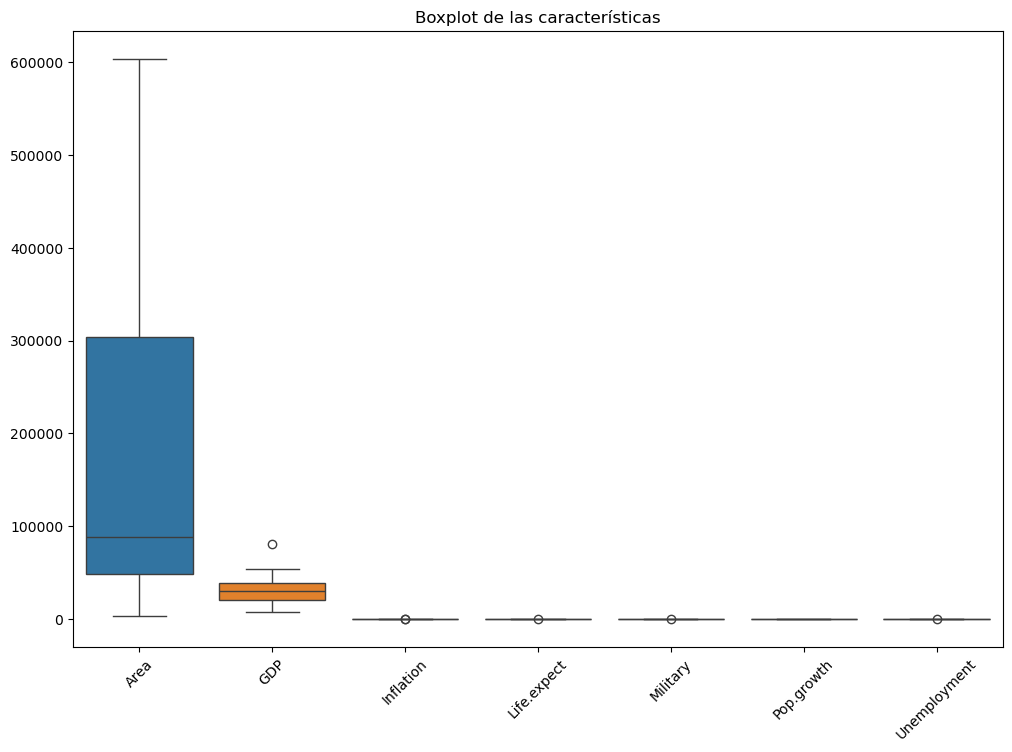

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df_without_country = df.drop(columns=['Country'])

plt.figure(figsize=(12,8))
sns.boxplot(data=df_without_country)
plt.xticks(rotation=45)
plt.title("Boxplot de las características")
plt.show()

# Boxplot del dataset luego de ser estandarizado

Para esto utilizamos la libreria Scikit-Learn y su StandardScaler

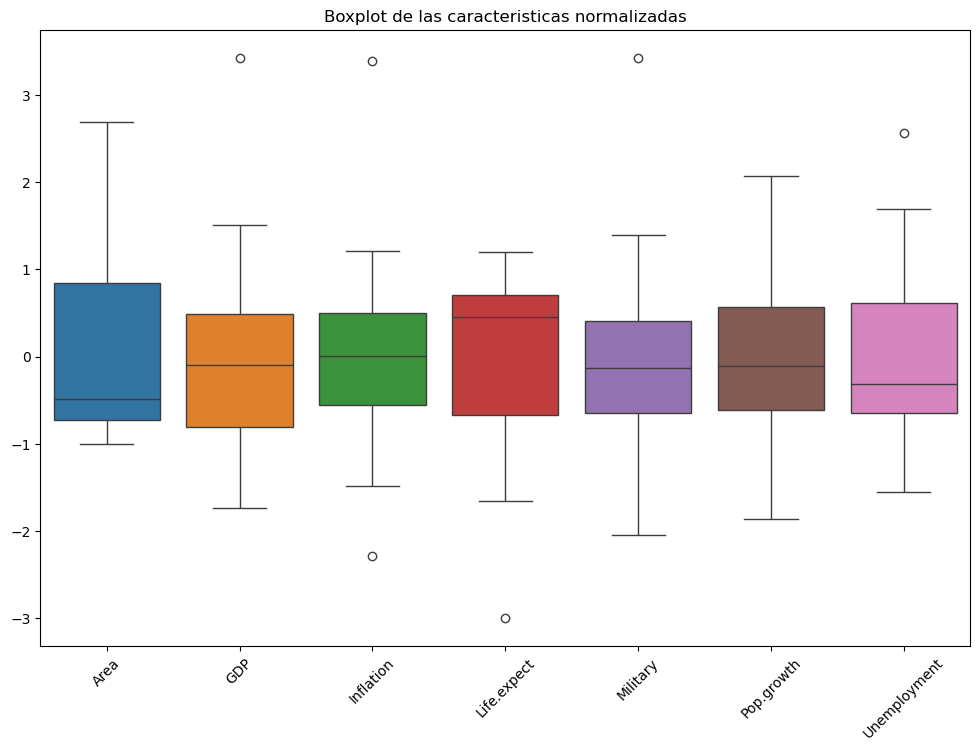

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df_values = scaler.fit_transform(df_without_country)
df_without_country_scaled = pd.DataFrame(scaled_df_values, columns=df_without_country.columns)

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_without_country_scaled)
plt.xticks(rotation=45)  # Rotar las etiquetas para que sean legibles
plt.title('Boxplot de las caracteristicas normalizadas')
plt.show()

# Calculo de PCA
En este caso tambien utilizaremos Scikit-Learn en este caso importando PCA. Asignamos a cada pais un numero asi es claro en el grafico cual es cual.

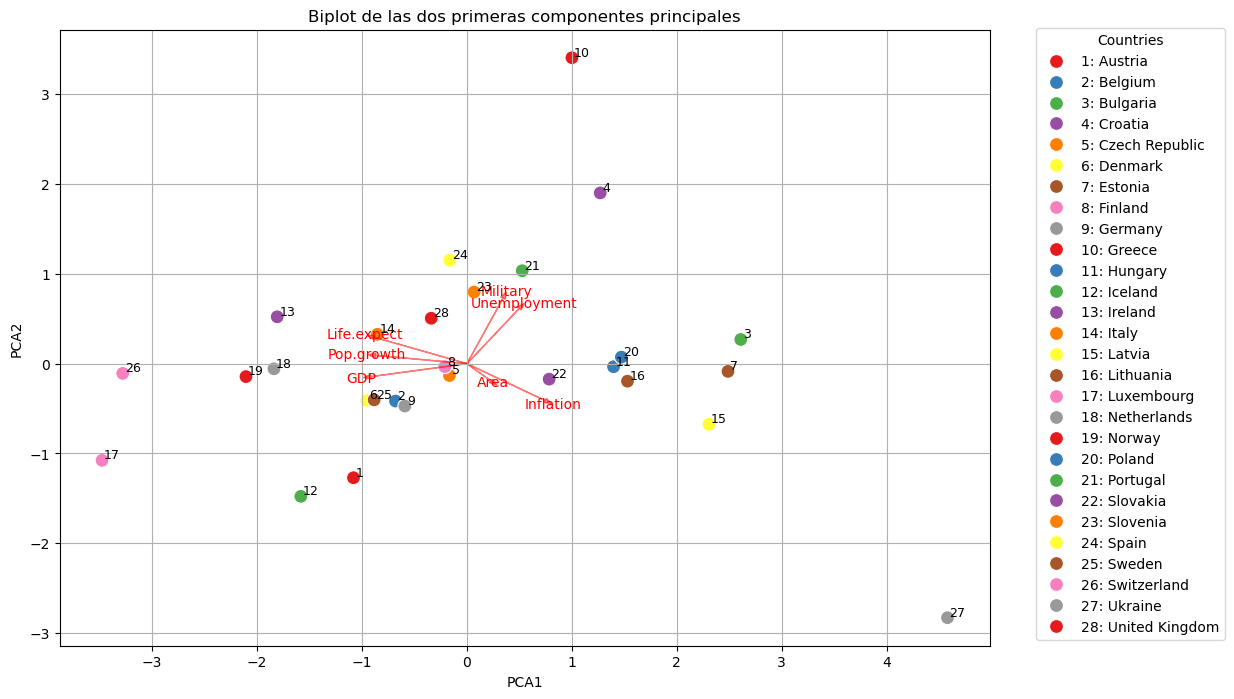

In [23]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)

principal_components=pca.fit_transform(df_without_country_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])
final_df = pd.concat([df["Country"], pca_df], axis=1)
final_df["Country_number"] = final_df.index + 1  

# 7. Crear una nueva columna que combine el número con el nombre del país
final_df['Country_with_number'] = final_df['Country_number'].astype(str) + ': ' + final_df['Country']


plt.figure(figsize=(12,8))
sns.scatterplot(x='PCA1', y='PCA2', data=final_df, hue='Country_with_number', palette='Set1', s=100)

# Añadir las direcciones de las variables originales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(df_without_country.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, feature, color='r', ha='center', va='center')
# Añadir números de cada país al lado de sus respectivos puntos
for i in range(final_df.shape[0]):
    plt.text(final_df['PCA1'][i] + 0.02, final_df['PCA2'][i] + 0.02, final_df['Country_number'][i], fontsize=9)

# Etiquetas y título
plt.title('Biplot de las dos primeras componentes principales')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc=(1.05, 0.01), title="Countries")
plt.grid(True)
plt.show()



# Grafico de barras de la primer componente principal de PCA
El grafico siguiente es el analisis solo de la primer componente de PCA

/tmp/ipykernel_819500/304763529.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='PCA1', data=pca_df, palette='Set2')


Text(0, 0.5, 'PCA1')

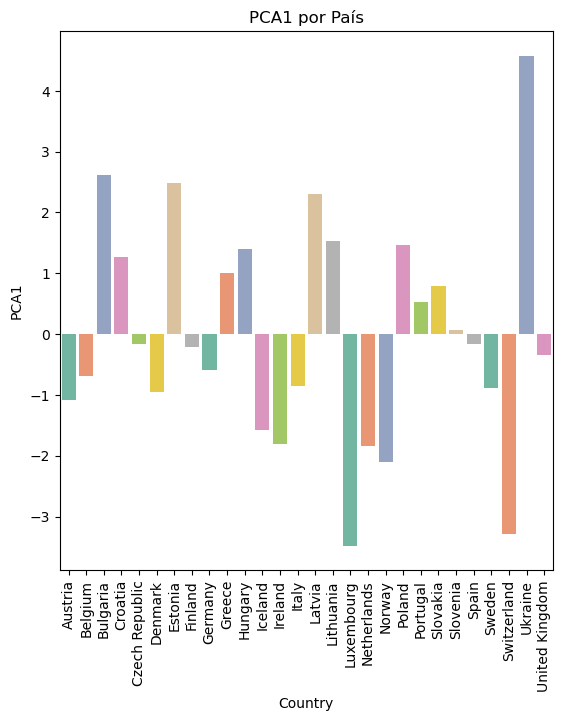

In [28]:
# 6. Añadir de vuelta la columna "Country"
pca_df['Country'] = df['Country']

# 7. Crear un gráfico de barras para PCA1 y PCA2
plt.figure(figsize=(14, 7))

# Gráfico de PCA1
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.barplot(x='Country', y='PCA1', data=pca_df, palette='Set2')
plt.title('PCA1 por País')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x
plt.ylabel('PCA1')
